# TOF data
Data taken at intervals of $T=0.1ms$, where $T$ represents the period of free flight after trapping. Captured in sequences of 10 ranging from 0.1ms to 1.0ms. 

In [1]:
import sys
sys.path.append("../")
import datarun
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [2]:
d = datarun.Experiment(
    vstart = .1,
    vend = 1.0,
    vstep = .1, 
    idx_start = 11,
    datapath = "/home/ben/Documents/Repos/MOTsArentForKids/data/mar02/",
    numtrials = 10
)

|████████████████████████████████████████| 100/100 [100%] in 4:28.2 (0.37/s)                                            


In [82]:
sigma_times = d.structure_data(lambda d : d.popt_x[2]**2)
means = [np.mean(arr) for arr in sigma_times.values()]
errs = [np.std(arr) for arr in sigma_times.values()]
time_list = np.array(list(sigma_times.keys()))

In [83]:
popt, pcov = curve_fit(lambda x,a,b:a*x**2+b, d.vlist, means, sigma=errs)

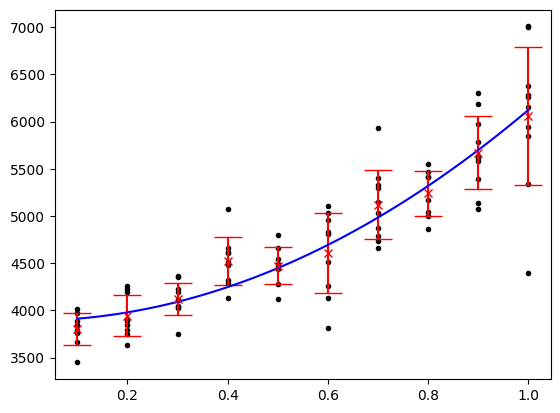

In [84]:
plt.errorbar(list(sigma_times.keys()),means, yerr = errs, linestyle = "None", c = 'r', capsize=10, marker = "x")
for time, arr in sigma_times.items():
    for val in arr:
        plt.scatter(time, val, c="k", marker = ".")

xaxis = np.linspace(min(d.vlist), max(d.vlist), 100)
plt.plot(xaxis, popt[0]*xaxis**2+popt[1], c="b")

In [85]:
v_rms = np.sqrt(popt[0])*dist*1e3

In [86]:
v_rms

0.10055487038538614

First, we have $\langle (x+vt)^2 \rangle = \langle x^2 \rangle + \langle v^2\rangle t^2$, using $\langle v \rangle = 0$, and thus the fit parameter $a$ gives the RMS velocity. Plugging this into the Maxwell-Bolzmann distribution,
$$
v_{rms} = \sqrt{\frac{3RT}{M}} \Rightarrow T = \frac{v_{rms}^2 M}{3R}
$$

In [87]:
v_rms**2*39.1/(3*8.315)*1e3

15.848912590357697

In [81]:
dist = .33*6.45e-6

## Values removed by visual defect

[.1][6] and [7]

[.2][4]

[.4][6]

[.5][1] and [4]

[.6][7]

[.8][4] and [9]

In [47]:
#d.data.remove(str_dat[.8][4])